# DTSA 5509 Final Project

## Project Overview

This project utilizes linear regression (supervised learning) techniques to predict housing prices in Ames, Iowa. Linear regression is widely used to predict housing prices due to its interpretability and the perceived linear relationship between the independent variables (# bedrooms, # bathrooms, etc.) and the dependent variable (house price). This allows prospective home buyers to evaluate the price of a home by comparing the asking price to the sale price of homes with similar features. Though this study is limited to houses in Ames, Iowa, the analysis can be extended to evalute home prices across other towns/regions.

The goal of this project is to provide insights into the impact of each feature on the house price, enabling homebuyers to understand the significance of different factors and make informed decisions in the real estate market.

In [225]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

## Step 1: Collect Data

The data used for this project was downloaded from Kaggle (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) and contains 1,460 observations with 80 features (not including ID) that describe almost every aspect of residential homes in Ames, Iowa. In total, there are 28 quantitative variables and 52 categorical variables. Some of the key features include:

LotArea: lot size in square feet

Bedroom: # of bedrooms

FullBath: # of full bathrooms

HalfBath: # of half bathrooms

HouseStyle: style of dwelling

YearBuilt: year house was built

SalePrice: sale price in U.S. dollars (target variable)

In [179]:
# read in data

df = pd.read_csv('/Users/colincunningham/Documents/MSDS/Intro to Supervised Learning/housing_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 2: Data Cleaning

I began the data cleaning step by removing irrelevant columns. These decisions were made at my discretion and were based on my domain knowledge of the real estate market. There are many features that were dropped, but a few include:

LotShape: general shape of property

LandContour: flatness of property

MSZoning: general zoning classification

Alley: type of alley access

The resulting dataset contains 15 columns after removing irrelevant features and can be viewed below:

In [180]:
# drop irrelevant columns

feats_to_include = ['LotArea', 'HouseStyle', 'OverallCond', 'Neighborhood', 'YearBuilt', 'CentralAir', 
                    'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'KitchenQual', 'PoolQC', 'Street',
                    'Alley', 'SalePrice']

clean1 = df[feats_to_include]
clean1.head()

,LotArea,HouseStyle,OverallCond,Neighborhood,YearBuilt,CentralAir,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,KitchenQual,PoolQC,Street,Alley,SalePrice
0,8450,2Story,5,CollgCr,2003,Y,1710,2,1,8,Gd,NaN,Pave,NaN,208500
1,9600,1Story,8,Veenker,1976,Y,1262,2,0,6,TA,NaN,Pave,NaN,181500
2,11250,2Story,5,CollgCr,2001,Y,1786,2,1,6,Gd,NaN,Pave,NaN,223500
3,9550,2Story,5,Crawfor,1915,Y,1717,1,0,7,Gd,NaN,Pave,NaN,140000
4,14260,2Story,5,NoRidge,2000,Y,2198,2,1,9,Gd,NaN,Pave,NaN,250000


In this next step, I examined the remaining columns further to check for missing values. According to the cell below, PoolQC (poool quality) and Alley (access to alley) contain 1,353 and 1,369 null values respectively. These columns have too many null values to impute and therefore were dropped from the analysis.

In [181]:
clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   HouseStyle    1460 non-null   object
 2   OverallCond   1460 non-null   int64 
 3   Neighborhood  1460 non-null   object
 4   YearBuilt     1460 non-null   int64 
 5   CentralAir    1460 non-null   object
 6   GrLivArea     1460 non-null   int64 
 7   FullBath      1460 non-null   int64 
 8   HalfBath      1460 non-null   int64 
 9   TotRmsAbvGrd  1460 non-null   int64 
 10  KitchenQual   1460 non-null   object
 11  PoolQC        7 non-null      object
 12  Street        1460 non-null   object
 13  Alley         91 non-null     object
 14  SalePrice     1460 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 171.2+ KB


In [182]:
# drop features with too many null values

clean2 = clean1.drop(['PoolQC', 'Alley'], axis=1)
clean2.head()

,LotArea,HouseStyle,OverallCond,Neighborhood,YearBuilt,CentralAir,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,KitchenQual,Street,SalePrice
0,8450,2Story,5,CollgCr,2003,Y,1710,2,1,8,Gd,Pave,208500
1,9600,1Story,8,Veenker,1976,Y,1262,2,0,6,TA,Pave,181500
2,11250,2Story,5,CollgCr,2001,Y,1786,2,1,6,Gd,Pave,223500
3,9550,2Story,5,Crawfor,1915,Y,1717,1,0,7,Gd,Pave,140000
4,14260,2Story,5,NoRidge,2000,Y,2198,2,1,9,Gd,Pave,250000


According to the output above, there are no longer missing values in the dataset. Next, in the cell below I inspected the resulting columns by printing out the unique values belonging to each feature. The only problematic variable could be "Neighborhood" which contains 25 distinct categorical values. One potential workaround is to group the neighborhoods and assign a score (1-5) based on their shared attributes. However, I don't have any additional insight into the neighborhoods in Ames, Iowa and therefore I decided to keep the variable as is and re-evaluate during the model building stage.

In [183]:
for c in clean2.columns:
    print(c, clean2[c].unique())

LotArea [ 8450  9600 11250 ... 17217 13175  9717]
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallCond [5 8 6 7 4 2 3 9 1]
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 190

After inspecting the unique values, I noticed that Street and CentralAir only contain 2 values. I decided to check for a potential class imbalance in both features. As seen below, the Street variable has a significant imbalance with the majority class (Pave) accounting for nearly 99.6% of the toal observations and was dropped from the analysis due to the perceived lack of value added. There was also a class imbalance with CentralAir, but it wasn't as extreme and therefore could be remedied with sampling techniques. 

In [184]:
pave = len(clean2[clean2['Street'] == 'Pave']) / len(clean2)
grvl = (1 - pave)

print(round(pave*100, 2), round(grvl*100, 2))

99.59 0.41


In [185]:
air_y = len(clean2[clean2['CentralAir'] == 'Y']) / len(clean2)
air_n = (1 - air_y)

print(round(air_y*100, 2), round(air_n*100, 2))

93.49 6.51


In [186]:
clean3 = clean2.drop(['Street'], axis=1)
clean3.head()

,LotArea,HouseStyle,OverallCond,Neighborhood,YearBuilt,CentralAir,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,KitchenQual,SalePrice
0,8450,2Story,5,CollgCr,2003,Y,1710,2,1,8,Gd,208500
1,9600,1Story,8,Veenker,1976,Y,1262,2,0,6,TA,181500
2,11250,2Story,5,CollgCr,2001,Y,1786,2,1,6,Gd,223500
3,9550,2Story,5,Crawfor,1915,Y,1717,1,0,7,Gd,140000
4,14260,2Story,5,NoRidge,2000,Y,2198,2,1,9,Gd,250000


Lastly, I used the summary statistics (see below) to identify outliers in the cleaned dataset. I noticed that the max value of LotArea is nearly 20 times larger than the average square footage. After further examination, the next largest observation was only 150,000 and therefore I dropped the one outlier from the data. 

In [187]:
clean3.describe()

,LotArea,OverallCond,YearBuilt,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,5.575342,1971.267808,1515.463699,1.565068,0.382877,6.517808,180921.195890
std,9981.264932,1.112799,30.202904,525.480383,0.550916,0.502885,1.625393,79442.502883
min,1300.000000,1.000000,1872.000000,334.000000,0.000000,0.000000,2.000000,34900.000000
25%,7553.500000,5.000000,1954.000000,1129.500000,1.000000,0.000000,5.000000,129975.000000
50%,9478.500000,5.000000,1973.000000,1464.000000,2.000000,0.000000,6.000000,163000.000000
75%,11601.500000,6.000000,2000.000000,1776.750000,2.000000,1.000000,7.000000,214000.000000
max,215245.000000,9.000000,2010.000000,5642.000000,3.000000,2.000000,14.000000,755000.000000


In [188]:
clean3 = clean3[clean3['LotArea'] < 200000]

## Exploratory Data Analysis (EDA)

I began the EDA stage by creating histograms for the quantative variables below. This allowed me to analyze the distributions and identify any outliers. As you can see below, most of the factors appear to be normallly distributed with the exception of YearBuilt which skews left. YearBuilt clearly violates the normality principle which is required for linear regression, and therefore it must be dealt with. In the end, I decided to drop the feature because OverallCond acts as a proxy for YearBuilt and captures the same information. 

array([<Axes: title={'center': 'LotArea'}>,
       <Axes: title={'center': 'OverallCond'}>,
       <Axes: title={'center': 'YearBuilt'}>,
       <Axes: title={'center': 'GrLivArea'}>,
       <Axes: title={'center': 'FullBath'}>,
       <Axes: title={'center': 'HalfBath'}>,
       <Axes: title={'center': 'TotRmsAbvGrd'}>,
       <Axes: title={'center': 'SalePrice'}>], dtype=object)

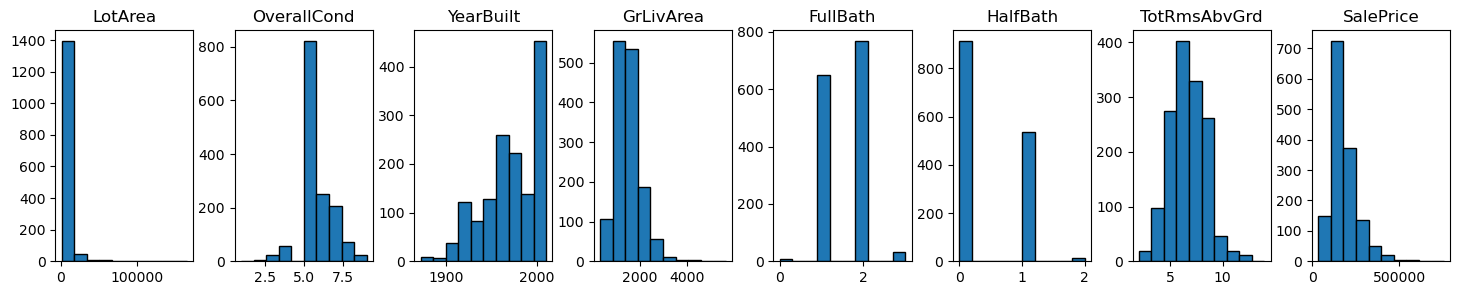

In [189]:
fig, axis = plt.subplots(1, 8, figsize=(18,3))

clean3.hist(ax=axis, edgecolor='black', grid=False)

In [190]:
clean4 = clean3.drop('YearBuilt', axis=1)
clean4.head()

,LotArea,HouseStyle,OverallCond,Neighborhood,CentralAir,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,KitchenQual,SalePrice
0,8450,2Story,5,CollgCr,Y,1710,2,1,8,Gd,208500
1,9600,1Story,8,Veenker,Y,1262,2,0,6,TA,181500
2,11250,2Story,5,CollgCr,Y,1786,2,1,6,Gd,223500
3,9550,2Story,5,Crawfor,Y,1717,1,0,7,Gd,140000
4,14260,2Story,5,NoRidge,Y,2198,2,1,9,Gd,250000


After examining the histograms, I created a correlation matrix with the remaining features. As you can see below, there appears to be a strong correlation between TotRmsAbvGrd (total rooms) and GrLivArea (square footage of home). This is expected because as the square footage should increase as the number of rooms increases. Due to the collinearity, I made a note not to include both factors in my final model.

Furthermore, GrLivArea appears to be highly correlated with SalePrice (target variable) and therefore it is a prime candidate to be included in the model building stage.

In [191]:
clean5 = clean4[['LotArea', 'HouseStyle', 'OverallCond', 'Neighborhood', 'CentralAir', 'GrLivArea', 
                 'TotRmsAbvGrd', 'FullBath', 'HalfBath', 'KitchenQual', 'SalePrice']]

corr = clean5.corr()
corr

/var/folders/wp/mp09gj2d51gbcn0xpbtvnhcc0000gn/T/ipykernel_1213/2133013980.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clean5.corr()


,LotArea,OverallCond,GrLivArea,TotRmsAbvGrd,FullBath,HalfBath,SalePrice
LotArea,1.000000,0.001941,0.295521,0.210127,0.136280,0.029610,0.272618
OverallCond,0.001941,1.000000,-0.079369,-0.057281,-0.193929,-0.061057,-0.077155
GrLivArea,0.295521,-0.079369,1.000000,0.825383,0.629822,0.416512,0.708655
TotRmsAbvGrd,0.210127,-0.057281,0.825383,1.000000,0.554567,0.344058,0.533440
FullBath,0.136280,-0.193929,0.629822,0.554567,1.000000,0.136849,0.560609
HalfBath,0.029610,-0.061057,0.416512,0.344058,0.136849,1.000000,0.286026
SalePrice,0.272618,-0.077155,0.708655,0.533440,0.560609,0.286026,1.000000


In the cell below, I created a contour plot which shows the concentration of observations across 2 features. In the plot below, I chose LotArea and SalePrice to get a better understanding of the price ranges in which various lots are selling for. As the graph depicts, many of the homes in our dataset measured between 8,000-10,000 square feet and sold for between 100k-150k U.S. dollars.

This graphic could potentially inform homebuyers of the price they should expect to pay given how large the lot is. Though this specific plot would likely not be applicable to dense urban areas such as New York where land/property is much more expensive, it could be applied to towns in other regions with similar population densities.

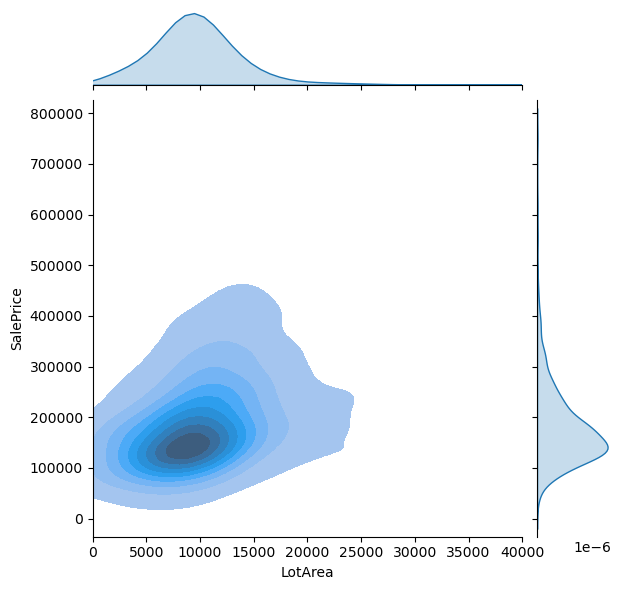

In [192]:
plot = sns.jointplot(x = 'LotArea',  y = 'SalePrice' , data = clean5,  kind = 'kde', fill = True)
plot.ax_marg_x.set_xlim(0, 40000)
plot = plt.show()

## Model Construction 

### Model Choice

The goal of my model is to predict the price of a home (quantitative target variable) so the traditional classification models were immediately ruled out. I ended up chosing linear regression due to its interpretability and the perceived linear relationship between the independent variables (# bedrooms, # bathrooms, etc.) and the dependent variable (home price). Furthermore, there an abundance of academic and industry research that justifies using linear regression for this specific task.

### Multicollinearity

One pitfall of linear regression is collinearity, which occurs when 2 or more of the independent variables are highly correlated. In the EDA section, we discovered that there was a high correlation (.82) between TotRmsAbvGrd and GrLivArea. I decided against dropping one of the features because I wanted to see if one outperformed the other, but I made a note not to include both in the final model.

### Feature Engineering 

In this section, I created a new feature called TotalBath that contains the total number of bathrooms for each home. I did this for 3 reasons: 

1. Reduce dimensionality of data
2. Domain knowledge: home listings usually don't distinguish between full and half baths (ex. 3.5 baths)
3. No data leakage - information still captured with 1 varialbe

In [193]:
def total_bath(full, half):
    return full + (.5*half)


#create new feature TotalBath
clean5['TotalBath'] = clean5.apply(lambda x: total_bath(x.FullBath, x.HalfBath), axis=1)

# drop intermediate features
clean5 = clean5.drop(['FullBath', 'HalfBath'], axis=1)

# reorder columns
clean5 = clean5[['LotArea', 'HouseStyle', 'OverallCond', 'Neighborhood', 'GrLivArea', 
                 'CentralAir', 'TotRmsAbvGrd', 'TotalBath', 'KitchenQual', 'SalePrice']]
clean5.head()

/var/folders/wp/mp09gj2d51gbcn0xpbtvnhcc0000gn/T/ipykernel_1213/1966829557.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean5['TotalBath'] = clean5.apply(lambda x: total_bath(x.FullBath, x.HalfBath), axis=1)


,LotArea,HouseStyle,OverallCond,Neighborhood,GrLivArea,CentralAir,TotRmsAbvGrd,TotalBath,KitchenQual,SalePrice
0,8450,2Story,5,CollgCr,1710,Y,8,2.5,Gd,208500
1,9600,1Story,8,Veenker,1262,Y,6,2.0,TA,181500
2,11250,2Story,5,CollgCr,1786,Y,6,2.5,Gd,223500
3,9550,2Story,5,Crawfor,1717,Y,7,1.0,Gd,140000
4,14260,2Story,5,NoRidge,2198,Y,9,2.5,Gd,250000


### Feature Selection

In this section, I used Forward Stepwise Refinement to select the parameters for my final model. I began by partitioning the dataset into training and test portions using sklearn's train_test_split function.


In [199]:
# split df into train/test with 80/20 split

df = clean5

train_df, test_df = train_test_split(df, test_size=0.2, random_state=5)

Next, I identified the best predictor by fitting 9 separate linear regression models, each with a single feature, and selecting the variable with the highest adjusted R2 value. As noted in the output, the best predictor is Neighborhood with an adjusted R2 of roughly 0.55. Therefore, my k=1 model predicted the home price based strictly on the neighborhood it was located in.

In [203]:
# create initial list of features
allowed_factors = ['LotArea', 'HouseStyle', 'OverallCond', 'Neighborhood', 'GrLivArea', 
                   'CentralAir', 'TotRmsAbvGrd', 'TotalBath', 'KitchenQual']

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='SalePrice~'+p, data=train_df).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

LotArea 0.06809309893739068
HouseStyle 0.080983395673898
OverallCond 0.006801911882119982
Neighborhood 0.5481584136121237
GrLivArea 0.49948942918399186
CentralAir 0.06192802332153269
TotRmsAbvGrd 0.2893231923064492
TotalBath 0.3488492319002887
KitchenQual 0.4701258023169693
best: ['Neighborhood', 0.5481584136121237]


In [204]:
# create k=1 model

mod1 = smf.ols(formula='SalePrice ~ Neighborhood', data=train_df).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     57.73
Date:                Sat, 23 Sep 2023   Prob (F-statistic):          8.01e-178
Time:                        12:06:38   Log-Likelihood:                -14374.
No. Observations:                1167   AIC:                         2.880e+04
Df Residuals:                    1142   BIC:                         2.892e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

The output above shows the OLS regression results from the k=1 model. It appears that some of the neighborhoods are statistically significant while others are not. The neighborhoods that aren't significant likely have a wider variety of homes (and home prices) compared to the neighborhoods (private communities?) with smaller p-values. 

In the cells below, I repeated the previous process by determing the best predictor by adding the feature with the highest adjusted R2 value for k=2, 3 ...

In [205]:
# remove feature that was added to model
allowed_factors2 = ['LotArea', 'HouseStyle', 'OverallCond', 'GrLivArea', 
                   'CentralAir', 'TotRmsAbvGrd', 'TotalBath', 'KitchenQual']

best = ['',0]
for p in allowed_factors2:
    model  = smf.ols(formula='SalePrice ~ Neighborhood + '+p, data=train_df).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

LotArea 0.5731972992232386
HouseStyle 0.5656449930948493
OverallCond 0.5545071545601241
GrLivArea 0.73512755318457
CentralAir 0.5567585969260421
TotRmsAbvGrd 0.6557442564901312
TotalBath 0.6260465433103115
KitchenQual 0.6705136263193969
best: ['GrLivArea', 0.73512755318457]


In [206]:
# create k=2 model

mod2 = smf.ols(formula='SalePrice ~ Neighborhood + GrLivArea', data=train_df).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     126.7
Date:                Sat, 23 Sep 2023   Prob (F-statistic):          8.39e-308
Time:                        12:16:20   Log-Likelihood:                -14062.
No. Observations:                1167   AIC:                         2.818e+04
Df Residuals:                    1141   BIC:                         2.831e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                8

In [207]:
# remove feature that was added to model
allowed_factors3 = ['LotArea', 'HouseStyle', 'OverallCond', 'CentralAir', 
                    'TotRmsAbvGrd', 'TotalBath', 'KitchenQual']

best = ['',0]
for p in allowed_factors3:
    model  = smf.ols(formula='SalePrice ~ Neighborhood + GrLivArea +'+p, data=train_df).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

LotArea 0.7375144711902887
HouseStyle 0.7613505182748183
OverallCond 0.7452064807396492
CentralAir 0.7408066752458523
TotRmsAbvGrd 0.7362373516148322
TotalBath 0.7358080828440358
KitchenQual 0.7844824834823941
best: ['KitchenQual', 0.7844824834823941]


In [213]:
# create k=3 model

mod3 = smf.ols(formula='SalePrice ~ Neighborhood + GrLivArea + KitchenQual', data=train_df).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     147.9
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:25:49   Log-Likelihood:                -13942.
No. Observations:                1167   AIC:                         2.794e+04
Df Residuals:                    1138   BIC:                         2.809e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [211]:
# remove feature that was added to model
allowed_factors4 = ['LotArea', 'HouseStyle', 'OverallCond', 
                    'CentralAir', 'TotRmsAbvGrd', 'TotalBath']

best = ['',0]
for p in allowed_factors4:
    model  = smf.ols(formula='SalePrice ~ Neighborhood + GrLivArea + KitchenQual +'+p, data=train_df).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

LotArea 0.7867941006105148
HouseStyle 0.8003608498061631
OverallCond 0.7888824468598188
CentralAir 0.7877964773386503
TotRmsAbvGrd 0.7848219981382198
TotalBath 0.7847742592275679
best: ['HouseStyle', 0.8003608498061631]


In [212]:
# create k=4 model

mod4 = smf.ols(formula='SalePrice ~ Neighborhood + GrLivArea + KitchenQual + HouseStyle', data=train_df).fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     129.5
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:25:11   Log-Likelihood:                -13897.
No. Observations:                1167   AIC:                         2.787e+04
Df Residuals:                    1131   BIC:                         2.805e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [214]:
# remove feature that was added to model
allowed_factors5 = ['LotArea', 'OverallCond', 'CentralAir', 'TotRmsAbvGrd', 'TotalBath']

best = ['',0]
for p in allowed_factors5:
    model  = smf.ols(formula='SalePrice ~ Neighborhood + GrLivArea + KitchenQual + HouseStyle +'+p, data=train_df).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

LotArea 0.801477579133349
OverallCond 0.8070243622396962
CentralAir 0.8034914068612751
TotRmsAbvGrd 0.8003610745125561
TotalBath 0.8006082153070992
best: ['OverallCond', 0.8070243622396962]


In [224]:
# create k=5 model

mod5 = smf.ols(formula='SalePrice ~ Neighborhood + GrLivArea + KitchenQual + HouseStyle + OverallCond', data=train_df).fit()
print(mod5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     131.3
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:02:44   Log-Likelihood:                -13878.
No. Observations:                1167   AIC:                         2.783e+04
Df Residuals:                    1130   BIC:                         2.802e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                7

In [216]:
# remove feature that was added to model
allowed_factors6 = ['LotArea', 'CentralAir', 'TotRmsAbvGrd', 'TotalBath']

best = ['',0]
for p in allowed_factors6:
    model  = smf.ols(formula='SalePrice ~ Neighborhood + GrLivArea + KitchenQual + HouseStyle + OverallCond +'+p, data=train_df).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

LotArea 0.8079269673253779
CentralAir 0.8087619890353634
TotRmsAbvGrd 0.8070245851775837
TotalBath 0.8074842443135075
best: ['CentralAir', 0.8087619890353634]


In [217]:
# create k=6 model

mod6 = smf.ols(formula='SalePrice ~ Neighborhood + GrLivArea + KitchenQual + HouseStyle + OverallCond + CentralAir', data=train_df).fit()
print(mod6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:32:10   Log-Likelihood:                -13872.
No. Observations:                1167   AIC:                         2.782e+04
Df Residuals:                    1129   BIC:                         2.801e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6

## Results & Analysis

### Model Evaluation

In the cell below, I plotted the models' Adjusted R2 values to visualize the additional information gained from adding a new feature. The graph depicts a sharp jump in Adjusted R2 from k=1 to k=2, a significant increase from k=2 to k=3, and then flattens out as k increases from 4 to 6.

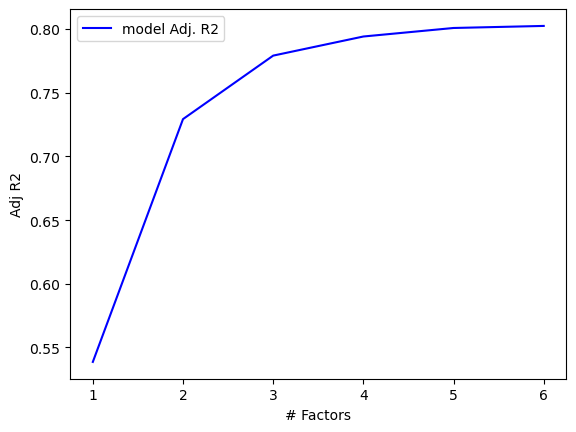

In [221]:
adjr2_train = [mod1.rsquared_adj, mod2.rsquared_adj, mod3.rsquared_adj, 
               mod4.rsquared_adj, mod5.rsquared_adj, mod6.rsquared_adj]


plt.plot([1,2,3,4,5,6], adjr2_train, 'b', label='model Adj. R2')
plt.xlabel('# Factors')
plt.ylabel('Adj R2')
plt.legend()

### Model Selection

I selected mod5 (SalePrice ~ Neighborhood + GrLivArea + KitchenQual + HouseStyle + OverallCond) as my final model because the Adjusted R2 graph appears to flatten at k=5. Therefore, as we increase the number of features past k=5, we fail to capture any additional predictive power and we risk overfitting the model to the training data. 

I did contemplate the k=4 model, but decided against it because there is still a significant difference in Adjusted R2 values, but also for fundamental/domain reasons. The feature added in mod5 is OverallCond (overall condition of home) which I believe is important to potential home buyers and therefore was kept in the final model.

### Model Summary

The cell below contains the summary statistics for my final model (k=5). As noted in the output, the model has an Adjusted R2 of 0.80 which suggests that the features in the model (Neighborhood, KitchenQual, HouseStyle, GrLivArea, and OverallCond) account for 80% of the variability in the homes' sale price. The model can be interpreted as follows:

* Quantitative variables: on average, for every 1 unit increase in ___ , the expected sale price for a home increases/decreases by the amount of the coefficient while holding the other features constant

* Categorical variables: on average, the price of a home located in ___ would increase/decrease by ___ compared to the base level

There is another test statistic in the output that gives credibility to the model. At the bottom of the summary, the Durbin-Watson statistic of 2.06 suggests that there is no autocorrelation detected in the model, which is a condition that must be met before performing linear regression.

In [222]:
print(mod5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     131.3
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:50:06   Log-Likelihood:                -13878.
No. Observations:                1167   AIC:                         2.783e+04
Df Residuals:                    1130   BIC:                         2.802e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                7

## Discussion And Conclusion

### Learning & Takeaways

I learned many new data analysis skills/techniques throughout the course of this project while uncovering insights into the real estate market. Most importantly, the process of building the end to end data pipeline (data gathering, data cleaning, EDA, etc.) was reinforced as I had the opportunity to start this project from the very beginning. As I performed the exploratory analysis on the data, I researched new ways to visualize the data so that I could become more familiar with the relationships between the variables. My research led me to contour plots which can be used to visualize concentrations amongst the joint distributions of multiple variables. This helped paint a more complete picture and provided useful insights into some of the factors that were eventually included in the final model.

### Things that didn't work

I learned that applying linear regression in a real-world setting is difficult due to the assumptions that must be met. For example, I carefully examined each of the independent variables for multicollinearity using a correlation matrix in the EDA stage. The matrix suggested that there were correlated features but they didn't have a score that met the multicollinearity threshold (0.7). However, the output from the final model still suggests that there still might be multicollinearity present. This is a significant problem with linear regression and certain techniques must be applied in any subsequent research before the model is applied to a real world setting.

### Improvements & Other Considerations

The majority of the features in the model appear to be statistically significant at an alpha level of 0.05. However, a few of the levels in "Neighborhood" have very high p-values. One potential solution to remove the insignificant levels and reduce overfitting is to group the various neighborhoods by their shared characteristics. Doing so would make the model more robust and the output more legible for the person who consumes it.

An interesting variation of this project involves converting the analysis into a classification problem in which we predict whether or not a home sells above or below it's asking price. To do this, we would need to either supplement the existing dataset with the initial asking price or find a new data source with these features. This hypothetical analysis could provide additional context for home buyers and help them navigate the real estate market.

## GitHub Access

For more information, you can access the GitHub repository here: https://github.com/colincunningham-cu/dtsa_5509_final_project